# Importação dos dados

In [1]:
import pandas as pd

# Exploração/pré-processamento

In [2]:
df = pd.read_csv('cobrancas_ia.csv', delimiter= ';', index_col=[0])

In [3]:
df.head()

,cobrador_id,cobrado_id,data,valor
cobranca_id,,,,
1,14,46,01/01/2023,"R$ 762,83"
2,41,45,01/01/2023,"R$ 1.084,60"
3,24,33,02/01/2023,"R$ 1.106,73"
4,26,2,03/01/2023,"R$ 1.152,65"
5,7,14,03/01/2023,"R$ 1.071,02"


In [4]:
df.tail()

,cobrador_id,cobrado_id,data,valor
cobranca_id,,,,
96,13,18,15/02/2023,"R$ 895,12"
97,24,48,16/02/2023,"R$ 1.444,40"
98,35,36,17/02/2023,"R$ 1.276,46"
99,9,41,17/02/2023,"R$ 1.157,45"
100,13,18,18/02/2023,"R$ 758,43"


In [5]:
df.dtypes

cobrador_id     int64
cobrado_id      int64
data           object
 valor         object
dtype: object

In [6]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [7]:
df['data'] = pd.to_datetime(df['data'], dayfirst=True)

In [8]:
df.valor = df.valor.str.replace('R$','') # removendo unidade monetária
df.valor = df.valor.str.replace(' ','')
df.valor = df.valor.str.replace(',','') # trocando vírgula para ponto como separador de decimal
df.valor = df.valor.str.replace('.','')

df.valor = pd.to_numeric(df.valor)
df.valor = df.valor/100

In [9]:
df.head()

,cobrador_id,cobrado_id,data,valor
cobranca_id,,,,
1,14,46,2023-01-01,762.83
2,41,45,2023-01-01,1084.60
3,24,33,2023-01-02,1106.73
4,26,2,2023-01-03,1152.65
5,7,14,2023-01-03,1071.02


In [10]:
df.dtypes

cobrador_id             int64
cobrado_id              int64
data           datetime64[ns]
valor                 float64
dtype: object

<Axes: >

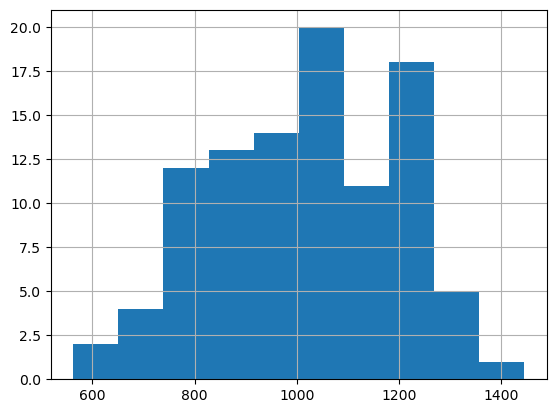

In [11]:
df.valor.hist()

In [14]:
df.cobrado_id.value_counts()

cobrado_id
48    7
18    6
37    5
36    5
8     5
31    4
9     3
22    3
17    3
44    3
46    3
15    3
2     3
19    3
10    2
12    2
40    2
1     2
32    2
34    2
45    2
27    2
41    2
13    2
28    2
35    2
33    2
5     2
39    1
21    1
23    1
16    1
24    1
6     1
3     1
42    1
43    1
4     1
49    1
25    1
50    1
29    1
14    1
38    1
Name: count, dtype: int64

In [15]:
df.cobrador_id.value_counts()

cobrador_id
40    6
24    5
9     5
36    4
41    4
7     4
31    4
11    3
38    3
17    3
37    3
14    3
19    3
43    3
48    3
2     2
22    2
45    2
28    2
16    2
35    2
50    2
46    2
15    2
8     2
33    2
26    2
39    2
12    2
30    2
47    2
13    2
4     1
25    1
18    1
27    1
21    1
32    1
49    1
20    1
44    1
23    1
Name: count, dtype: int64